# NEURAL NETWORKS

### Neural Network implementation from [Supervised Learning Project](https://github.com/EdidiongA/Supervised-Machine-Learning)

In [ ]:
# Clone the repository
!git clone https://github.com/hiive/mlrose.git
%cd mlrose

# Fetch all pull requests
!git fetch origin pull/22/head:fix-joblib-issue

# Checkout the specific pull request
!git checkout fix-joblib-issue

# Install the package from the local clone with the applied fix
!pip install .

# Return to the original directory if needed
%cd ..

Cloning into 'mlrose'...
remote: Enumerating objects: 2606, done.
remote: Counting objects: 100% (396/396), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 2606 (delta 251), reused 343 (delta 229), pack-reused 2210
Receiving objects: 100% (2606/2606), 1.97 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (1827/1827), done.
/content/mlrose
From https://github.com/hiive/mlrose
 * [new ref]         refs/pull/22/head -> fix-joblib-issue
Switched to branch 'fix-joblib-issue'
Processing /content/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102985 sha256=03f0a3d3249ff010851af02942aefd89f7345d1342cd16a9505b9e9648c50fcd
  Stored in directory: /tmp/pip-ephem-wheel-cache-5307htdm/wheels/50/ac/56/a248001dcf63344fbef992039dec2613cb4a7c56222c6f9a92
Successfully built mlrose-hiive
/content


In [ ]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import random_hill_climb, simulated_annealing, genetic_alg, mimic, FourPeaks, TravellingSales, Queens
from mlrose_hiive import ExpDecay, GeomDecay, ArithDecay, DiscreteOpt, SARunner, GARunner, RHCRunner, MIMICRunner, NNGSRunner
#from mlrose_hiive.fitness import FourPeaks, QueensGenerator
import time
import random

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install umap-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import umap.umap_ as umap
from sklearn.model_selection import cross_val_score
from time import time
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=8a070e943e3cf5c0263e05b60aec20244061d33ac9d6a5218458dd030430c1c9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X2 = spambase.data.features
y2 = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [ ]:
# Drop missing values from the feature set
X2_clean = X2.dropna()

# Since rows are dropped from X, we need to make sure that y corresponds to these rows
# We use the index of the cleaned X to filter y
y2_clean = y2.loc[X2_clean.index]

In [ ]:
# Rename the clean feature set and target variable
X2 = X2_clean

y2 = y2_clean

In [ ]:
# Combine features and target into a single DataFrame if needed
spambase_df = pd.concat([X2, y2], axis=1)

spambase_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
X2.shape

(4601, 57)

In [ ]:
y2.shape

(4601, 1)

In [ ]:

#Make a copy of the original dataset
new_df2 = spambase_df.copy()

# Corrected the regex and reset index
#df = spambase_df.replace(r'^\s*$', np.nan, regex=True).dropna().reset_index(drop=True)

df2 = new_df2.copy()

# Define features and labels
features2, labels2 = df2.drop('Class', axis=1), df2['Class'] == 'Yes'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Scale data
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Encode target
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(y2)


# Splitting the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Cross-validation setup
cv_folds = 5

In [ ]:
import numpy as np

# from keras.utils import np_utils

# Neural Network training and evaluation

# Modified function to create and train a neural network model with depth and width
def create_train_nn(width, depth, dropout, lr, batch_size, X_train2, y_train2, X_test2, y_test2):
    model = Sequential()
    model.add(Dense(width, input_dim=X_train2.shape[1], activation='relu'))  # First layer with input dimension
    model.add(Dropout(dropout))
    for _ in range(depth-1):  # Adding 'depth-1' additional layers
        model.add(Dense(width, activation='relu'))  # Subsequent layers with 'width' nodes
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
    history = model.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=100, batch_size=batch_size, verbose=0)
    return model, history

# Function to evaluate model performance remains the same
def evaluate_model(model, X_train2, y_train2, X_test2, y_test2):
    train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)[1]
    #train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)[1]
    test_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)[1]
    return train_accuracy2, test_accuracy2

# Initialize variables to store best NN model and its performance
best_nn_model2 = None
best_val_loss2 = float('inf')
best_loss2 = float('inf')
best_train_acc2 = 0
best_test_acc2 = 0

# Parameters for Neural Network including width and depth
width_list = [16, 32, 64]  # Width refers to the number of nodes in each layer
depth_list = [1, 2, 3]  # Depth refers to the number of layers
dropout_list = [0, 0.2]
lr_list = [0.01, 0.005, 0.001]
batch_size_list = [32, 64, 128]

nn_performance2 = []

# Loop through all combinations including depth and width
for width in width_list:
    for depth in depth_list:
        for dropout in dropout_list:
            for lr in lr_list:
                for batch_size in batch_size_list:
                    nn_model, history = create_train_nn(width, depth, dropout, lr, batch_size, X_train2, y_train2, X_test2, y_test2)
                    train_acc2, test_acc2 = evaluate_model(nn_model, X_train2, y_train2, X_test2, y_test2)
                    nn_performance2.append({
                        "width": width,
                        "depth": depth,
                        "dropout": dropout,
                        "learning_rate": lr,
                        "batch_size": batch_size,
                        "train_accuracy": train_acc2,
                        "test_accuracy": test_acc2
                    })
                    val_loss = np.min(history.history['val_loss'])
                    loss = np.min(history.history['loss'])
                    if val_loss < best_val_loss2 and loss < best_loss2:
                        best_val_loss2 = val_loss
                        best_loss2 = loss
                        best_nn_model2 = nn_model
                        best_train_acc2 = train_acc2
                        best_test_acc2 = test_acc2
                    # Plotting the history
                    plt.figure(figsize=(12, 4))
                    plt.subplot(1, 2, 1)
                    plt.plot(history.history['loss'], label='Training Loss')
                    plt.plot(history.history['val_loss'], label='Validation Loss')
                    plt.title(f'NN Loss \n(Width: {width}, Depth: {depth}, Dropout: {dropout}, LR: {lr}, Batch: {batch_size})')
                    plt.xlabel('Epochs')
                    plt.ylabel('Loss')
                    plt.legend()

                    plt.subplot(1, 2, 2)
                    plt.plot(history.history['accuracy'], label='Training Accuracy')
                    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                    plt.title(f'NN Accuracy \n(Width: {width}, Depth: {depth}, Dropout: {dropout}, LR: {lr}, Batch: {batch_size})')
                    plt.xlabel('Epochs')
                    plt.ylabel('Accuracy')
                    plt.legend()
                    plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import random_hill_climb, simulated_annealing, genetic_alg, mimic, FourPeaks
from mlrose_hiive import ExpDecay, GeomDecay, ArithDecay, DiscreteOpt, SARunner, GARunner, RHCRunner, MIMICRunner, NNGSRunner
import time
import random
from mlrose_hiive import NeuralNetwork
from mlrose_hiive.algorithms.rhc import random_hill_climb
from mlrose_hiive.algorithms.sa import simulated_annealing
from mlrose_hiive.algorithms.ga import genetic_alg

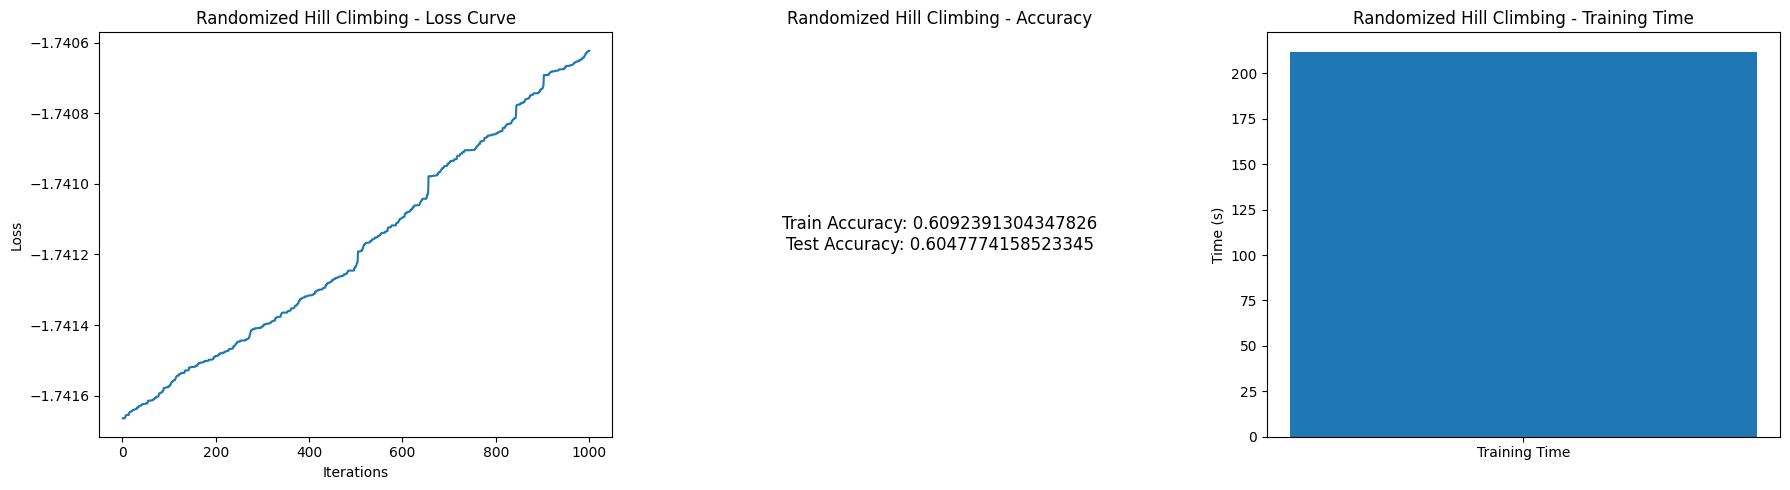

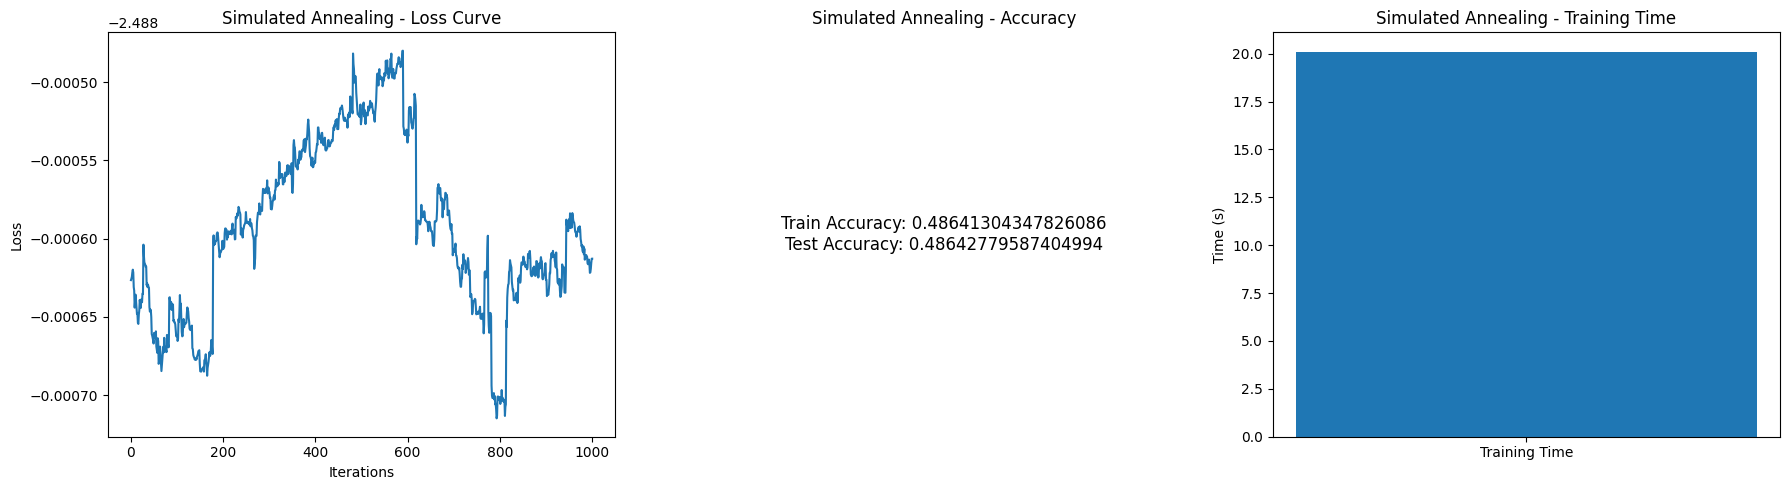

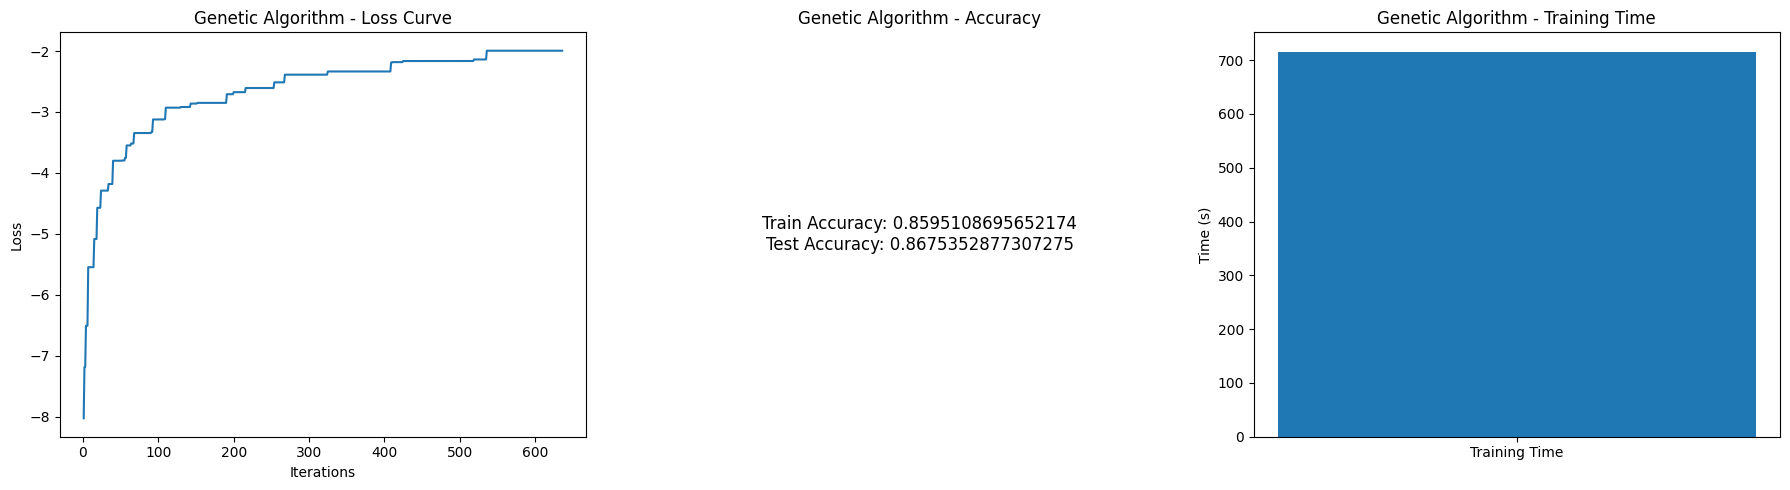

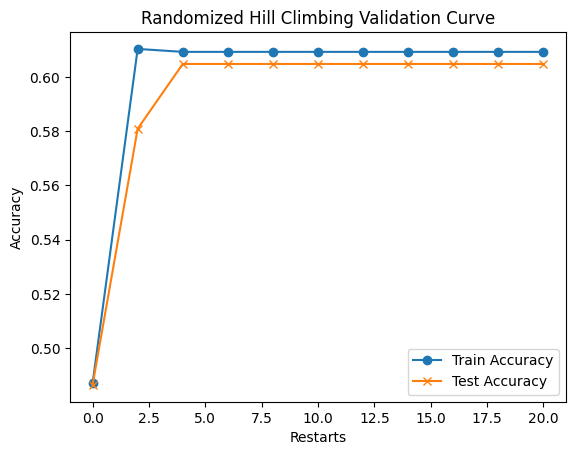

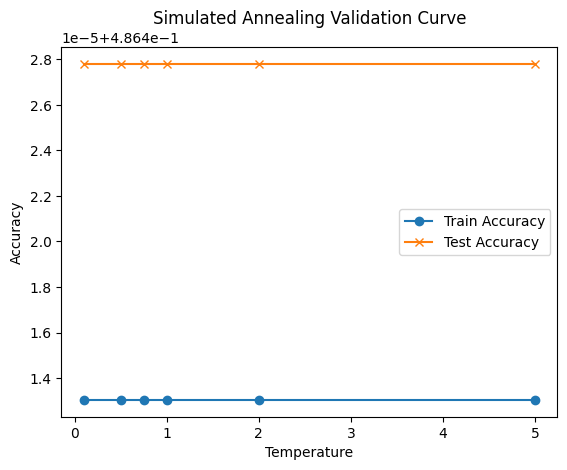

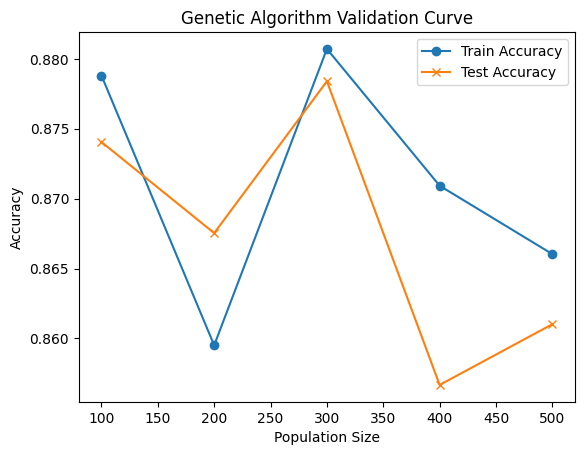

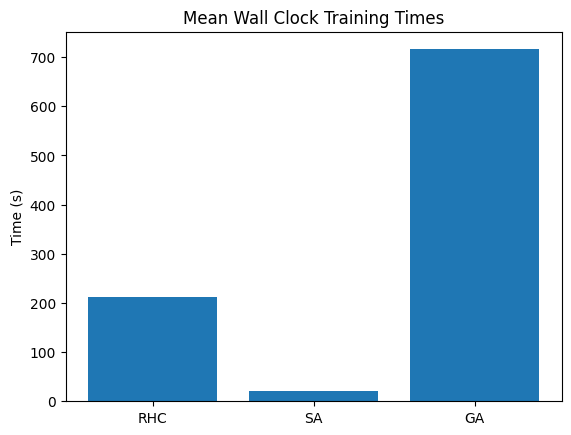

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from time import time
from sklearn.neural_network import MLPClassifier  # Assuming usage of MLPClassifier for NeuralNetwork

# Function to initialize and train NN using specified algorithm
def train_nn_with_algorithm(algorithm, algorithm_name, X_train2, y_train2, X_test2, y_test2, **kwargs):
    # Adjust algorithm-specific parameters
    if algorithm_name == 'simulated_annealing':
        temperature = kwargs.pop('temperature', 1.0)  # Default temperature if not provided
        schedule = GeomDecay(init_temp=temperature)
        kwargs['schedule'] = schedule

    # Define a fitness function
    fitness_fn = NeuralNetwork(hidden_nodes=[16], activation='relu',
                                            algorithm=algorithm_name, max_iters=1000,
                                            bias=True, is_classifier=True, learning_rate=0.0001,
                                            early_stopping=True, clip_max=5, max_attempts=100,
                                            random_state=42, curve=True, **kwargs)

    start_time = time()
    # Train the model
    fitness_fn.fit(X_train2, y_train2)
    end_time = time()

    # Predict training and test sets
    y_train_pred2 = fitness_fn.predict(X_train2)
    y_test_pred2 = fitness_fn.predict(X_test2)

    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train2, y_train_pred2)
    test_accuracy = accuracy_score(y_test2, y_test_pred2)

    # Calculate training time
    training_time = end_time - start_time

    # Gather performance metrics
    performance_metrics = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'loss_curve': fitness_fn.fitness_curve[:, 0] if fitness_fn.fitness_curve is not None else [],
        'iteration_curve': np.arange(1, len(fitness_fn.fitness_curve) + 1) if fitness_fn.fitness_curve is not None else []
    }

    # Store algorithm-specific parameters if they exist
    for key, value in kwargs.items():
        performance_metrics[key] = value

    return fitness_fn, performance_metrics

# Plot validation, loss and accuracy, learning and cross-validation, performance curves
def plot_curves(metrics, title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Plot Loss Curve
    if metrics['loss_curve'].size > 0:
        axs[0].plot(metrics['iteration_curve'], -metrics['loss_curve'])
        axs[0].set_title(f'{title} - Loss Curve')
        axs[0].set_xlabel('Iterations')
        axs[0].set_ylabel('Loss')

    # Display Accuracy as Text
    axs[1].text(0.5, 0.5, f"Train Accuracy: {metrics['train_accuracy']}\nTest Accuracy: {metrics['test_accuracy']}",
                horizontalalignment='center', verticalalignment='center', fontsize=12, transform=axs[1].transAxes)
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].axis('off')

    # Plot Training Time
    axs[2].bar(['Training Time'], [metrics['training_time']])
    axs[2].set_title(f'{title} - Training Time')
    axs[2].set_ylabel('Time (s)')

    plt.tight_layout()
    plt.show()


# Implement the training and plotting for each algorithm
# Randomized Hill Climbing
rhc_model, rhc_metrics = train_nn_with_algorithm(random_hill_climb, 'random_hill_climb', X_train2, y_train2, X_test2, y_test2, restarts=10)
plot_curves(rhc_metrics, 'Randomized Hill Climbing')

# Simulated Annealing
sa_model, sa_metrics = train_nn_with_algorithm(simulated_annealing, 'simulated_annealing', X_train2, y_train2, X_test2, y_test2, schedule=GeomDecay())
plot_curves(sa_metrics, 'Simulated Annealing')

# Genetic Algorithm
ga_model, ga_metrics = train_nn_with_algorithm(genetic_alg, 'genetic_alg', X_train2, y_train2, X_test2, y_test2, pop_size=200)
plot_curves(ga_metrics, 'Genetic Algorithm')

# Plot validation curve with training and test accuracies
def plot_validation_curve(parameters, train_accuracies, test_accuracies, x_label, title):
    plt.plot(parameters, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(parameters, test_accuracies, label='Test Accuracy', marker='x')
    plt.title(f'{title} Validation Curve')
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Lists of parameters for RHC, SA, GA
restarts_list = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
temperature_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
population_list = [100, 200, 300, 400, 500]

# Train and plot validation curve for RHC
rhc_train_accuracies, rhc_test_accuracies = [], []
for restarts in restarts_list:
    _, metrics = train_nn_with_algorithm(random_hill_climb, 'random_hill_climb', X_train2, y_train2, X_test2, y_test2, restarts=restarts)
    rhc_train_accuracies.append(metrics['train_accuracy'])
    rhc_test_accuracies.append(metrics['test_accuracy'])
plot_validation_curve(restarts_list, rhc_train_accuracies, rhc_test_accuracies, 'Restarts', 'Randomized Hill Climbing')

# Train and plot validation curve for SA
sa_train_accuracies, sa_test_accuracies = [], []
for temp in temperature_list:
    _, metrics = train_nn_with_algorithm(simulated_annealing, 'simulated_annealing', X_train2, y_train2, X_test2, y_test2, temperature=temp)
    sa_train_accuracies.append(metrics['train_accuracy'])
    sa_test_accuracies.append(metrics['test_accuracy'])
plot_validation_curve(temperature_list, sa_train_accuracies, sa_test_accuracies, 'Temperature', 'Simulated Annealing')


# Train and plot validation curve for GA
ga_train_accuracies, ga_test_accuracies = [], []
for pop_size in population_list:
    _, metrics = train_nn_with_algorithm(genetic_alg, 'genetic_alg', X_train2, y_train2, X_test2, y_test2, pop_size=pop_size)
    ga_train_accuracies.append(metrics['train_accuracy'])
    ga_test_accuracies.append(metrics['test_accuracy'])
plot_validation_curve(population_list, ga_train_accuracies, ga_test_accuracies, 'Population Size', 'Genetic Algorithm')

# For GA, since population size is fixed, we don't plot a validation curve but still train and show performance
#ga_model, ga_metrics = train_nn_with_algorithm(None, 'ga', X_train2, y_train2, X_test2, y_test2, pop_size=200)  # Update None to actual GA function
# You can use ga_metrics to show performance details as needed

# Additional plots and analysis can be done similarly to the original code
# Bar graph for mean wall clock training times
training_times = [rhc_metrics['training_time'], sa_metrics['training_time'], ga_metrics['training_time']]
plt.bar(['RHC', 'SA', 'GA'], training_times)
plt.title('Mean Wall Clock Training Times')
plt.ylabel('Time (s)')
plt.show()

### Using the randomization algorithms to find weights for the Neural Network implementation above

In [ ]:

from mlrose_hiive import ContinuousOpt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import log_loss
import mlrose_hiive

# Define the neural network structure
def create_nn_model(input_size):
    model = Sequential()
    model.add(Dense(16, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Custom Fitness class for the neural network
class NNFitness:
    def __init__(self, model, X_train2, y_train2):
        self.model = model
        self.X_train2 = X_train2
        self.y_train2 = y_train2

    def evaluate(self, state):
        new_weights = self.decode_weights(state)
        self.model.set_weights(new_weights)
        predictions = self.model.predict(self.X_train2)
        return -log_loss(self.y_train2, predictions)  # Negative log loss because we want to maximize the fitness


    def decode_weights(self, state):
        new_weights = []
        start = 0
        for layer in self.model.layers:
            if len(layer.get_weights()) > 0:
                w_shape = layer.get_weights()[0].shape
                b_shape = layer.get_weights()[1].shape
                w_size = np.prod(w_shape)
                b_size = np.prod(b_shape)
                if start + w_size + b_size > len(state):
                    raise ValueError("State does not have enough parameters to decode all weights and biases.")
                layer_weights = state[start:start+w_size].reshape(w_shape)
                layer_biases = state[start+w_size:start+w_size+b_size].reshape(b_shape)
                new_weights.append(layer_weights)
                new_weights.append(layer_biases)
                start += w_size + b_size
        return new_weights

    # Method required by mlrose_hiive to determine problem type
    def get_prob_type(self):
        return 'continuous'

# Initialize the neural network model

input_size = X_train2.shape[1]
model = create_nn_model(input_size)

# Flatten the initial weights
initial_weights = np.concatenate([layer.get_weights()[0].flatten() for layer in model.layers if len(layer.get_weights()) > 0] +
                                 [layer.get_weights()[1].flatten() for layer in model.layers if len(layer.get_weights()) > 0])



# Initialize custom fitness function wrapped in a class with get_prob_type method
nn_fitness = NNFitness(model, X_train2, y_train2)

# Define the optimization problem
problem_size = len(initial_weights)
problem = mlrose_hiive.ContinuousOpt(length=problem_size, fitness_fn=nn_fitness, maximize=True)


# Apply optimization algorithms (example with Randomized Hill Climbing)
#rhc_best_state, rhc_best_fitness = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=800, restarts=5, init_state=initial_weights, curve=True)
rhc_best_state, rhc_best_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                              max_attempts=10,
                                                                              max_iters=800,
                                                                              restarts=5,
                                                                              init_state=initial_weights,
                                                                              curve=True,
                                                                              random_state=1)

# Decode the best weights and set them to the model
rhc_best_weights = nn_fitness.decode_weights(rhc_best_state)
model.set_weights(rhc_best_weights)

# Evaluate the model with the best weights found
rhc_evaluation = model.evaluate(X_test2, y_test2, verbose=0)
print("Evaluation Loss:", rhc_evaluation[0])
print("Evaluation Accuracy:", rhc_evaluation[1])

# Print out the computed weights
print("\nComputed Weights:")
for layer_weights in rhc_best_weights:
    print(layer_weights)


# Apply optimization algorithms (example with Simulated Annealing)
# sa_best_state, sa_best_fitness = mlrose_hiive.simulated_annealing(problem, max_attempts=10, max_iters=800, restarts=5, init_state=initial_weights, curve=True)
sa_best_state, sa_best_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                            schedule=mlrose_hiive.ExpDecay(),
                                                                            max_attempts=10,
                                                                            max_iters=800,
                                                                            init_state=initial_weights,
                                                                            curve=True,
                                                                            random_state=1)


# Decode the best weights and set them to the model
sa_best_weights = nn_fitness.decode_weights(sa_best_state)
model.set_weights(sa_best_weights)

# Evaluate the model with the best weights found
sa_evaluation = model.evaluate(X_test2, y_test2, verbose=0)
print("Evaluation Loss:", sa_evaluation[0])
print("Evaluation Accuracy:", sa_evaluation[1])

# Print out the computed weights
print("\nComputed Weights:")
for layer_weights in sa_best_weights:
    print(layer_weights)


# Apply optimization algorithms (example with Genetic algorithm)
#ga_best_state, ga_best_fitness = mlrose_hiive.genetic_alg(problem, max_attempts=10, max_iters=800, restarts=5, init_state=initial_weights, curve=True)
ga_best_state, ga_best_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                                    pop_size=200,
                                                                    mutation_prob=0.1,
                                                                    max_attempts=10,
                                                                    max_iters=800,
                                                                    curve=True,
                                                                    random_state=1)

# Decode the best weights and set them to the model
ga_best_weights = nn_fitness.decode_weights(ga_best_state)
model.set_weights(ga_best_weights)

# Evaluate the model with the best weights found
ga_evaluation = model.evaluate(X_test2, y_test2, verbose=0)
print("Evaluation Loss:", ga_evaluation[0])
print("Evaluation Accuracy:", ga_evaluation[1])

# Print out the computed weights
print("\nComputed Weights:")
for layer_weights in ga_best_weights:
    print(layer_weights)

Streaming output truncated to the last 5000 lines.
115/115 [==============================] - 0s 1ms/step
Evaluation Loss: 12.702584266662598
Evaluation Accuracy: 0.423452764749527

Computed Weights:
[[9.31013056e-01 6.69474830e-01 7.98983290e-01 6.78026767e-01
  8.15774661e-01 5.52418060e-01 3.51262192e-01 6.05030191e-01
  1.47844438e-02 7.11431305e-01 8.64099423e-03 7.27242827e-01
  2.08359770e-01 2.49469979e-01 3.92002507e-01 2.80553363e-01]
 [5.81135148e-01 3.15546999e-01 4.79638127e-01 1.88862203e-01
  4.10328742e-01 7.88726867e-01 6.43440821e-01 8.73252290e-01
  4.09578770e-01 1.35393359e-01 5.06634017e-01 5.14926629e-01
  3.10746128e-01 7.89266380e-01 6.17403842e-01 6.19620539e-01]
 [9.21744368e-01 7.88914851e-01 9.29366676e-02 8.71201737e-01
  1.76418963e-01 3.11070389e-01 6.03452108e-01 2.21334229e-02
  5.40822649e-01 1.41739769e-01 3.99175384e-01 4.78660077e-01
  3.40219869e-01 9.60689025e-01 2.92608986e-01 1.19534115e-01]
 [8.99036702e-01 6.01837613e-01 3.94622964e-01 7.1513